In [1]:
# all tensorflow api is accessible through this
import tensorflow as tf
# to visualize the resutls
import matplotlib.pyplot as plt
# 70k mnist dataset that comes with the tensorflow container
from tensorflow.examples.tutorials.mnist import input_data

In [2]:
# Data ingestion

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)  


Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [3]:
tf.set_random_seed(0)

In [57]:
# 1. Define Variables and Placeholders

X = tf.placeholder(tf.float32, [None, 28, 28, 1]) #the first dimension (None) will index the images
Y_ = tf.placeholder(tf.float32, [None,10])  # placeholder of correct values
XX = tf.reshape(X, [-1, 784])

# Weights initialised with small random values between -0.2 and +0.2

W1 = tf.Variable(tf.truncated_normal([784, 200 ],stddev = 0.1))# 784 = 28 * 28
B1 = tf.Variable(tf.zeros([200]))
W2 = tf.Variable(tf.truncated_normal([200, 100], stddev = 0.1))
B2 = tf.Variable(tf.zeros([100]))
W3 = tf.Variable(tf.truncated_normal([100, 60], stddev = 0.1))
B3 = tf.Variable(tf.zeros([60]))
W4 = tf.Variable(tf.truncated_normal([60, 30], stddev = 0.1))
B4 = tf.Variable(tf.zeros([30]))
W5 = tf.Variable(tf.truncated_normal([30,10], stddev = 0.1))
B5 = tf.Variable(tf.zeros([10]))


In [69]:
# Learning rate placeholer

global_step = tf.Variable(0, trainable=False)

starter_learning_rate = 0.5

lr = tf.train.exponential_decay(starter_learning_rate, global_step,100, 1.0, staircase=True)


# placeholder for probability of keeping a node during dropout = 1.0 at test time (no dropout) and 0.75 at training time
pkeep = tf.placeholder(tf.float32)

In [70]:
# 2. Define the model
Y1 = tf.nn.relu(tf.matmul(XX,W1) + B1)
Y1d = tf.nn.dropout(Y1, pkeep)

Y2 = tf.nn.relu(tf.matmul(Y1d, W2) + B2)
Y2d = tf.nn.dropout(Y2, pkeep)

Y3 = tf.nn.relu(tf.matmul(Y2d, W3) + B3)
Y3d = tf.nn.dropout(Y3, pkeep)

Y4 = tf.nn.relu(tf.matmul(Y3d, W4) + B4)
Y4d = tf.nn.dropout(Y4, pkeep)

Ylogits = tf.matmul(Y4,W5) + B5

Y = tf.nn.softmax(Ylogits)


In [71]:
# Define the loss function

cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(Ylogits,Y_)) 

In [72]:
#  Define the accuracy 
# tf.argmax is function which gives you the index of the highest entry in a tensor along some axis.
# For example, tf.argmax(y,1) is the label our model thinks is most likely for each input, 
#while tf.argmax(y_,1) is the true label. 

#is_correct = tf.equal(tf.argmax(Ylogits,1), tf.argmax(Y_,1))

is_correct = tf.equal(tf.argmax(Y,1), tf.argmax(Y_,1))


accuracy = tf.reduce_mean(tf.cast(is_correct,tf.float32))

In [73]:
# Define an optimizer

#optimizer = tf.train.GradientDescentOptimizer(0.5)
optimizer = tf.train.GradientDescentOptimizer(lr)
#optimizer = tf.train.AdamOptimizer(0.005)
#optimizer = tf.train.AdamOptimizer(0.005)
train_step = optimizer.minimize(cross_entropy, global_step = global_step)

In [74]:
# Define and run the session, initialising all the variables
init = tf.initialize_all_variables()
sess = tf.Session()
sess.run(init)

In [75]:
def training_step(i, update_test_data, update_train_data):
    print "\r", i,
    #Reading the batches of 100 images with 100 labels
    batch_X, batch_Y = mnist.train.next_batch(100)
    # the backpropagation training step
    sess.run(train_step, feed_dict={XX: batch_X, Y_: batch_Y, pkeep:0.75})
    
    ####### evaluating model performance for printing purposes
    # evaluation used to later visualize how well you did at a particular time in the training
    #rray containing the test, train accuracy and cross entrpopy values
    train_a = []
    train_c = []
    test_a =  []
    test_c =  []
    
    if update_train_data:
        a, c = sess.run([accuracy, cross_entropy], feed_dict={XX: batch_X, Y_: batch_Y, pkeep:0.75})
        train_a.append(a)
        train_c.append(c)
        
    if update_test_data:
        a, c = sess.run([accuracy, cross_entropy], feed_dict={XX: mnist.test.images, Y_: mnist.test.labels, pkeep:1.0})
        test_a.append(a)
        test_c.append(c)
    
    return (train_a, train_c, test_a, test_c)


In [76]:
# 6. Train and test the model, store the accuracy and loss per iteration

train_a = []
train_c = []
test_a = []
test_c = []

training_iter = 10000
epoch_size = 100

for i in range(training_iter):
    test = False
    if i % epoch_size == 0:  # Creating bins of 100
        test = True
        
    a, c, ta, tc = training_step(i, test, test)
    train_a += a
    train_c += c
    test_a += ta
    test_c += tc

9999


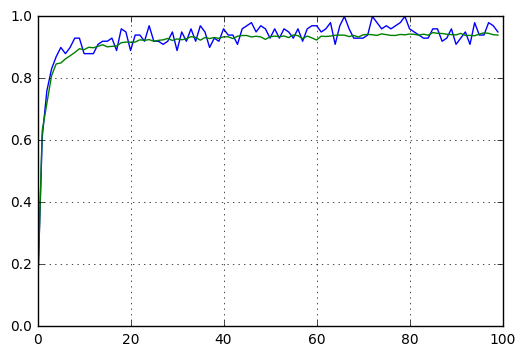

In [77]:
# 7. Plot and visualise the accuracy and loss

# accuracy training vs testing dataset

plt.plot(train_a)
plt.plot(test_a)
plt.grid(True)
plt.show()


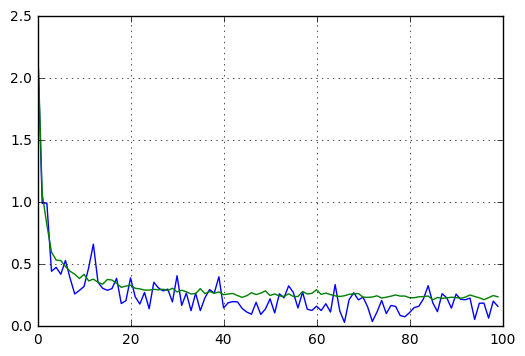

In [78]:
# Loss Training vs test data
plt.plot(train_c)
plt.plot(test_c)
plt.grid(True)
plt.show()

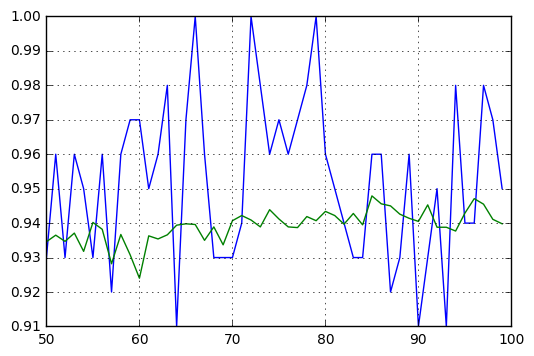

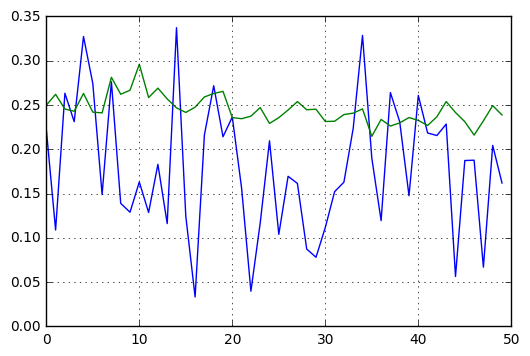

In [79]:
# Zoom in on the tail of the plots
zoom_point = 50
x_range = range(zoom_point,training_iter/epoch_size)
plt.plot(x_range, train_a[zoom_point:])
plt.plot(x_range, test_a[zoom_point:])
plt.grid(True)
plt.show()

plt.plot(train_c[zoom_point:])
plt.plot(test_c[zoom_point:])
plt.grid(True)
plt.show()